In [3]:
from sklearn import datasets
import pandas as pd

In [4]:
df_csv = pd.read_csv('/content/sample_data/(Final)yayaya4.csv')
df_csv

,1. 동별 2030대 인구수,2. 동별 유동인구,3. 대구로카페 주문고객
0,2255,74000.00,14
1,2015,47000.00,12
2,4271,80000.00,43
3,2239,61785.00,4
4,9617,160352.00,52
...,...,...,...
75,7108,140957.81,11
76,7792,182033.00,59
77,1417,75612.12,3
78,0,68423.30,0


In [5]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
mall_scaled_df = pd.DataFrame(standard_scaler.fit_transform(df_csv), columns=df_csv.columns) # scaled된 데이터

In [6]:
#MinMaxScaler 적용
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df_csv)
df_scaled = scaler.transform(df_csv)

In [7]:
# nd.array형인 df_scaled를 dataframe으로 수정하는 코드
df_scaled = pd.DataFrame(df_scaled, columns = ['2030대 인구', '유동인구','대구로카페주문고객'])
df_scaled

,2030대 인구,유동인구,대구로카페주문고객
0,0.076237,0.166652,0.083333
1,0.068123,0.100188,0.071429
2,0.144393,0.181422,0.255952
3,0.075696,0.136583,0.023810
4,0.325129,0.379218,0.309524
...,...,...,...
75,0.240306,0.331477,0.065476
76,0.263430,0.432588,0.351190
77,0.047906,0.170620,0.017857
78,0.000000,0.152924,0.000000


In [8]:
df_scaled['총점'] = df_scaled['2030대 인구'] + df_scaled['유동인구']+ df_scaled['대구로카페주문고객']
df_scaled


,2030대 인구,유동인구,대구로카페주문고객,총점
0,0.076237,0.166652,0.083333,0.326222
1,0.068123,0.100188,0.071429,0.239739
2,0.144393,0.181422,0.255952,0.581767
3,0.075696,0.136583,0.023810,0.236088
4,0.325129,0.379218,0.309524,1.013871
...,...,...,...,...
75,0.240306,0.331477,0.065476,0.637259
76,0.263430,0.432588,0.351190,1.047209
77,0.047906,0.170620,0.017857,0.236383
78,0.000000,0.152924,0.000000,0.152924


In [9]:
#df_scaled['cluster'] = 0
df_scaled

,2030대 인구,유동인구,대구로카페주문고객,총점
0,0.076237,0.166652,0.083333,0.326222
1,0.068123,0.100188,0.071429,0.239739
2,0.144393,0.181422,0.255952,0.581767
3,0.075696,0.136583,0.023810,0.236088
4,0.325129,0.379218,0.309524,1.013871
...,...,...,...,...
75,0.240306,0.331477,0.065476,0.637259
76,0.263430,0.432588,0.351190,1.047209
77,0.047906,0.170620,0.017857,0.236383
78,0.000000,0.152924,0.000000,0.152924


In [10]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')

# create model and prediction
model = DBSCAN(eps=0.1,min_samples=5)
predict = pd.DataFrame(model.fit_predict(df_scaled))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([df_scaled,predict],axis=1)

print(r)


    2030대 인구      유동인구  대구로카페주문고객        총점  predict
0   0.076237  0.166652   0.083333  0.326222        0
1   0.068123  0.100188   0.071429  0.239739        0
2   0.144393  0.181422   0.255952  0.581767       -1
3   0.075696  0.136583   0.023810  0.236088        0
4   0.325129  0.379218   0.309524  1.013871       -1
..       ...       ...        ...       ...      ...
75  0.240306  0.331477   0.065476  0.637259       -1
76  0.263430  0.432588   0.351190  1.047209       -1
77  0.047906  0.170620   0.017857  0.236383        0
78  0.000000  0.152924   0.000000  0.152924        0
79  0.000000  0.172903   0.172619  0.345522       -1

[80 rows x 5 columns]


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: Use

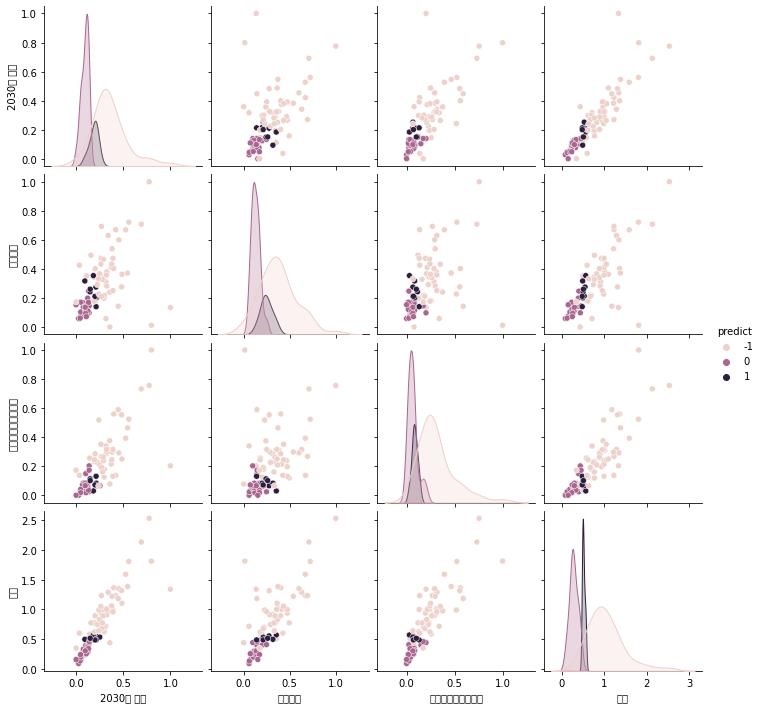

In [11]:
#pairplot with Seaborn
sns.pairplot(r,hue='predict')
plt.show()

In [12]:
r.to_csv('/content/sample_data/DBSCAN_result.csv')